<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Artem/lenet/Artem_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MODEL FROM PREVIOUS EXPERIMENT***

<table>
  <tr>
    <th>Layer</th>
    <th>Layer type2</th>
    <th>Feature maps</th>
    <th>Size</th>
    <th>Kernel size</th>
    <th>Stride</th>
    <th>Padding</th>
    <th>Activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>5</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>6</th>
    <th>avg pooling</th>
    <th>4</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>10</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>11</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>12</th>
    <th>max pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>13</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>14</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU6</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

Train dataset: MNIST + EMNIST letters

Test dataset: dataset of DreamTeam

Training sample size: 36960

Testing sample size: 16784

Loss function: Cross Entropy Loss

Optimizers: [SGD, Adam, Adagrad, RMSprop, Rprop]

Learning rate: [0.005, 0.001, 0.0005, 0.0001]

Batch size: 1120

***IMPORT***

---

In [1]:
import torch
import torchvision.datasets
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm_notebook as bar
import plotly.graph_objects as go


In [2]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
import scipy.stats as stats

***REPO***

---



In [4]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36557, done.
remote: Counting objects: 100% (12917/12917), done.
remote: Compressing objects: 100% (12747/12747), done.
remote: Total 36557 (delta 229), reused 12805 (delta 160), pack-reused 23640
Receiving objects: 100% (36557/36557), 130.12 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (514/514), done.


***TORCH.DEVICE***

---



In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

***DATASET***

---



In [6]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:11<00:00, 49366396.43it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


***NET***

In [7]:
class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.batch1 = torch.nn.BatchNorm2d(2)
    self.act1 = torch.nn.ReLU6()
    self.dp1 = torch.nn.Dropout(p=0.1)

    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.batch2 = torch.nn.BatchNorm2d(2)
    self.act2 = torch.nn.ReLU6()
    self.dp2 = torch.nn.Dropout(p=0.1)

    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.batch3 = torch.nn.BatchNorm2d(4)
    self.act3 = torch.nn.ReLU6()
    self.dp3 = torch.nn.Dropout(p=0.1)

    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.batch4 = torch.nn.BatchNorm2d(4)
    self.act4 = torch.nn.ReLU6()
    self.dp4 = torch.nn.Dropout(p=0.1)

    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU6()

    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.batch5 = torch.nn.BatchNorm2d(8)
    self.act6 = torch.nn.ReLU6()
    self.dp5 = torch.nn.Dropout(p=0.1)

    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.batch6 = torch.nn.BatchNorm2d(8)
    self.act7 = torch.nn.ReLU6()
    self.dp6 = torch.nn.Dropout(p=0.1)

    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.batch7 = torch.nn.BatchNorm2d(16)
    self.act8 = torch.nn.ReLU6()
    self.dp7 = torch.nn.Dropout(p=0.1)

    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.batch8 = torch.nn.BatchNorm2d(16)
    self.act9 = torch.nn.ReLU6()
    self.dp8 = torch.nn.Dropout(p=0.1)

    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU6()

    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU6()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU6()

    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.batch1(x)
    x = self.act1(x)
    x = self.dp1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.batch2(x)
    x = self.act2(x)
    x = self.dp2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.batch3(x)
    x = self.act3(x)
    x = self.dp3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.batch4(x)
    x = self.act4(x)
    x = self.dp4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.batch5(x)
    x = self.act6(x)
    x = self.dp5(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.batch6(x)
    x = self.act7(x)
    x = self.dp6(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.batch7(x)
    x = self.act8(x)
    x = self.dp7(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.batch8(x)
    x = self.act9(x)
    x = self.dp8(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

***SGD***

In [ ]:
batch_size = 1120
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
test_accuracies = []
for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(lenet.parameters(), lr = learning_rate)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracies.append(test_accuracy)

<ipython-input-20-20dab9ee27fb>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):


LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-20-20dab9ee27fb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):


LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[0], mode = 'lines+markers'))
fig.update_layout(title = "SGD 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[1], mode = 'lines+markers'))
fig.update_layout(title = "SGD 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[2], mode = 'lines+markers'))
fig.update_layout(title = "SGD 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[3], mode = 'lines+markers'))
fig.update_layout(title = "SGD 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

***Adam***

In [ ]:
batch_size = 1120
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
test_accuracies = []
for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(lenet.parameters(), lr = learning_rate)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracies.append(test_accuracy)

<ipython-input-25-9ec164034c65>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-25-9ec164034c65>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[0], mode = 'lines+markers'))
fig.update_layout(title = "Adam 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[1], mode = 'lines+markers'))
fig.update_layout(title = "Adam 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[2], mode = 'lines+markers'))
fig.update_layout(title = "Adam 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[3], mode = 'lines+markers'))
fig.update_layout(title = "Adam 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

***Adagrad***

In [ ]:
batch_size = 1120
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
test_accuracies = []
for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adagrad(lenet.parameters(), lr = learning_rate)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracies.append(test_accuracy)

<ipython-input-9-cf10e1c82508>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):


LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-9-cf10e1c82508>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):


LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[0], mode = 'lines+markers'))
fig.update_layout(title = "Adagrad 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[1], mode = 'lines+markers'))
fig.update_layout(title = "Adagrad 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[2], mode = 'lines+markers'))
fig.update_layout(title = "Adagrad 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[3], mode = 'lines+markers'))
fig.update_layout(title = "Adagrad 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

***RMSprop***

In [ ]:
batch_size = 1120
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
test_accuracies = []
for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.RMSprop(lenet.parameters(), lr = learning_rate)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracies.append(test_accuracy)

<ipython-input-14-e49e4f18ff18>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-14-e49e4f18ff18>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[0], mode = 'lines+markers'))
fig.update_layout(title = "RMSprop 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[1], mode = 'lines+markers'))
fig.update_layout(title = "RMSprop 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[2], mode = 'lines+markers'))
fig.update_layout(title = "RMSprop 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[3], mode = 'lines+markers'))
fig.update_layout(title = "RMSprop 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

***Rprop***

In [ ]:
batch_size = 1120
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
test_accuracies = []
for learning_rate in bar(learning_rates, desc = "LEARNING RATES"):
  lenet = LeNet().to(device)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Rprop(lenet.parameters(), lr = learning_rate)
  test_accuracy = []
  for epoch in bar(range(100), desc = 'LEARNING', leave=False):
    indexs = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()
      batch_index = indexs[start_index: start_index + batch_size]
      labels_batch = train_labels[batch_index].to(device)

      images_batch = train_data[batch_index].to(device)
      prediction = lenet.forward(images_batch)
      loss_value = loss(prediction, labels_batch)
      loss_value.backward()
      optimizer.step()

    lenet.eval()
    with torch.no_grad():
      prediction_test = lenet.forward(test_data)
      test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
      test_accuracy.append(test_acc)
    lenet.train()

  test_accuracies.append(test_accuracy)

<ipython-input-19-81d50268605e>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-19-81d50268605e>:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[0], mode = 'lines+markers'))
fig.update_layout(title = "Rprop 0.005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[1], mode = 'lines+markers'))
fig.update_layout(title = "Rprop 0.001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[2], mode = 'lines+markers'))
fig.update_layout(title = "Rprop 0.0005", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

In [ ]:
fig  = go.Figure(data=go.Scatter(x=[i for i in range(100)], y = test_accuracies[3], mode = 'lines+markers'))
fig.update_layout(title = "Rprop 0.0001", xaxis_title= "epoch", yaxis_title="accuracy")
fig.show()

***EXPERIMENT SGD***

In [ ]:
learning_rates = [0.0001]
for learning_rate in bar(range(1), desc = "LEARNING RATES", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet().to(device)

    optimizer = torch.optim.SGD(lenet.parameters(), lr=learning_rates[learning_rate])
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(100), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF SGD {learning_rates[learning_rate]}:\n', *accuracy_net)

***EXPERIMENT ADAM***

In [ ]:
learning_rates = [0.005, 0.001, 0.0005, 0.0001]
for learning_rate in bar(range(4), desc = "LEARNING RATES", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet().to(device)

    optimizer = torch.optim.Adam(lenet.parameters(), lr=learning_rates[learning_rate])
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(100), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF Adam {learning_rates[learning_rate]}:\n', *accuracy_net)

<ipython-input-33-a420c39552cd>:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



LEARNING RATES:   0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-33-a420c39552cd>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-33-a420c39552cd>:13: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7730)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7772)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7824)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7872)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7782)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7817)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7529)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7498)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7711)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7526)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7800)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7664)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7716)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7736)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7730)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7721)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7700)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7378)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7763)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7611)
ACCURACY OF Adam 0.005:
 tensor(0.7730) tensor(0.7772) tensor(0.7824) tensor(0.7872) tensor(0.7782) tensor(0.7817) tensor(0.7529) tensor(0.7498) tensor(0.7711) tensor(0.7526) tensor(0.7800) tensor(0.7664) tensor(0.7716) tensor(0.7736) tensor(0.7730) tensor(0.7721) tensor(0.7700) tensor(0.7378) tensor(0.7763) tensor(0.7611)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7604)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7423)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7667)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7813)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7446)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7581)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7510)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7478)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7651)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7781)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7726)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7771)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7559)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7843)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7768)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7549)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7774)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7511)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7809)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7833)
ACCURACY OF Adam 0.001:
 tensor(0.7604) tensor(0.7423) tensor(0.7667) tensor(0.7813) tensor(0.7446) tensor(0.7581) tensor(0.7510) tensor(0.7478) tensor(0.7651) tensor(0.7781) tensor(0.7726) tensor(0.7771) tensor(0.7559) tensor(0.7843) tensor(0.7768) tensor(0.7549) tensor(0.7774) tensor(0.7511) tensor(0.7809) tensor(0.7833)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7604)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7522)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7766)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7567)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7668)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7832)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7777)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7585)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7609)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7680)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7677)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7753)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7535)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7836)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7613)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7811)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7640)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7508)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7722)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7519)
ACCURACY OF Adam 0.0005:
 tensor(0.7604) tensor(0.7522) tensor(0.7766) tensor(0.7567) tensor(0.7668) tensor(0.7832) tensor(0.7777) tensor(0.7585) tensor(0.7609) tensor(0.7680) tensor(0.7677) tensor(0.7753) tensor(0.7535) tensor(0.7836) tensor(0.7613) tensor(0.7811) tensor(0.7640) tensor(0.7508) tensor(0.7722) tensor(0.7519)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7186)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7330)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7378)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6976)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6941)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6990)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6869)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6889)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6960)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7468)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6921)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7313)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7132)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6585)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7188)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7175)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7059)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7233)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7105)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7272)
ACCURACY OF Adam 0.0001:
 tensor(0.7186) tensor(0.7330) tensor(0.7378) tensor(0.6976) tensor(0.6941) tensor(0.6990) tensor(0.6869) tensor(0.6889) tensor(0.6960) tensor(0.7468) tensor(0.6921) tensor(0.7313) tensor(0.7132) tensor(0.6585) tensor(0.7188) tensor(0.7175) tensor(0.7059) tensor(0.7233) tensor(0.7105) tensor(0.7272)


In [14]:
acc_adam_005 = "tensor(0.7730) tensor(0.7772) tensor(0.7824) tensor(0.7872) tensor(0.7782) tensor(0.7817) tensor(0.7529) tensor(0.7498) tensor(0.7711) tensor(0.7526) tensor(0.7800) tensor(0.7664) tensor(0.7716) tensor(0.7736) tensor(0.7730) tensor(0.7721) tensor(0.7700) tensor(0.7378) tensor(0.7763) tensor(0.7611)"
acc_adam_001 = "tensor(0.7604) tensor(0.7423) tensor(0.7667) tensor(0.7813) tensor(0.7446) tensor(0.7581) tensor(0.7510) tensor(0.7478) tensor(0.7651) tensor(0.7781) tensor(0.7726) tensor(0.7771) tensor(0.7559) tensor(0.7843) tensor(0.7768) tensor(0.7549) tensor(0.7774) tensor(0.7511) tensor(0.7809) tensor(0.7833)"
acc_adam_0005 = "tensor(0.7604) tensor(0.7522) tensor(0.7766) tensor(0.7567) tensor(0.7668) tensor(0.7832) tensor(0.7777) tensor(0.7585) tensor(0.7609) tensor(0.7680) tensor(0.7677) tensor(0.7753) tensor(0.7535) tensor(0.7836) tensor(0.7613) tensor(0.7811) tensor(0.7640) tensor(0.7508) tensor(0.7722) tensor(0.7519)"
acc_adam_0001 = "tensor(0.7186) tensor(0.7330) tensor(0.7378) tensor(0.6976) tensor(0.6941) tensor(0.6990) tensor(0.6869) tensor(0.6889) tensor(0.6960) tensor(0.7468) tensor(0.6921) tensor(0.7313) tensor(0.7132) tensor(0.6585) tensor(0.7188) tensor(0.7175) tensor(0.7059) tensor(0.7233) tensor(0.7105) tensor(0.7272)"

***EXPERIMENT ADAGRAD***

In [ ]:
learning_rates = [0.0001]
for learning_rate in bar(range(4), desc = "LEARNING RATES", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet().to(device)

    optimizer = torch.optim.Adagrad(lenet.parameters(), lr=learning_rates[learning_rate])
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(100), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF Adagrad {learning_rates[learning_rate]}:\n', *accuracy_net)

In [15]:
acc_adagrad_005 = "tensor(0.7351) tensor(0.7032) tensor(0.7534) tensor(0.7241) tensor(0.7542) tensor(0.7375) tensor(0.7358) tensor(0.7247) tensor(0.7529) tensor(0.7359) tensor(0.7196) tensor(0.7324) tensor(0.7239) tensor(0.7320) tensor(0.7165) tensor(0.7430) tensor(0.7171) tensor(0.7010) tensor(0.7587) tensor(0.7475)"

***EXPERIMENT RMSPROP***

In [8]:
learning_rates = [0.0001]
for learning_rate in bar(range(1), desc = "LEARNING RATES", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet().to(device)

    optimizer = torch.optim.RMSprop(lenet.parameters(), lr=learning_rates[learning_rate])
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(100), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF RMSprop {learning_rates[learning_rate]}:\n', *accuracy_net)

<ipython-input-8-0170d1a46bfc>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for learning_rate in bar(range(1), desc = "LEARNING RATES", leave= False):


LEARNING RATES:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-8-0170d1a46bfc>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-8-0170d1a46bfc>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), leave=False):


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7330)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6807)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7241)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6882)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7340)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7216)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7176)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7063)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7327)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6919)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7114)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7129)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7138)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7094)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7271)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7174)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7180)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6967)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.6895)


  0%|          | 0/100 [00:00<?, ?it/s]

tensor(0.7170)
ACCURACY OF RMSprop 0.0001:
 tensor(0.7330) tensor(0.6807) tensor(0.7241) tensor(0.6882) tensor(0.7340) tensor(0.7216) tensor(0.7176) tensor(0.7063) tensor(0.7327) tensor(0.6919) tensor(0.7114) tensor(0.7129) tensor(0.7138) tensor(0.7094) tensor(0.7271) tensor(0.7174) tensor(0.7180) tensor(0.6967) tensor(0.6895) tensor(0.7170)


In [16]:
acc_rmsprop_005 = "tensor(0.7651) tensor(0.7329) tensor(0.0530) tensor(0.0499) tensor(0.7579) tensor(0.0681) tensor(0.0681) tensor(0.0681) tensor(0.0530) tensor(0.7505) tensor(0.7330) tensor(0.0681) tensor(0.0681) tensor(0.7706) tensor(0.7456) tensor(0.7534) tensor(0.7656) tensor(0.7652) tensor(0.7317) tensor(0.7717)"
acc_rmsprop_001 = "tensor(0.7662) tensor(0.7835) tensor(0.7666) tensor(0.7624) tensor(0.7685) tensor(0.7529) tensor(0.7713) tensor(0.7694) tensor(0.7658) tensor(0.7454) tensor(0.7699) tensor(0.7685) tensor(0.7644) tensor(0.7291) tensor(0.7744) tensor(0.7503) tensor(0.7570) tensor(0.7728) tensor(0.7507) tensor(0.7911)"
acc_rmsprop_0005 = "tensor(0.7471) tensor(0.7534) tensor(0.7574) tensor(0.7758) tensor(0.7781) tensor(0.7887) tensor(0.7394) tensor(0.7657) tensor(0.7913) tensor(0.7598) tensor(0.7586) tensor(0.7233) tensor(0.7738) tensor(0.7863) tensor(0.7729) tensor(0.7899) tensor(0.7665) tensor(0.7656) tensor(0.7825) tensor(0.7745)"
acc_rmsprop_0001 = "tensor(0.7330) tensor(0.6807) tensor(0.7241) tensor(0.6882) tensor(0.7340) tensor(0.7216) tensor(0.7176) tensor(0.7063) tensor(0.7327) tensor(0.6919) tensor(0.7114) tensor(0.7129) tensor(0.7138) tensor(0.7094) tensor(0.7271) tensor(0.7174) tensor(0.7180) tensor(0.6967) tensor(0.6895) tensor(0.7170)"

***EXPERIMENT RPROP***

In [ ]:
learning_rates = [0.0001]
for learning_rate in bar(range(2), desc = "LEARNING RATES", leave= False):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT', leave = False):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet().to(device)

    optimizer = torch.optim.Rprop(lenet.parameters(), lr=learning_rates[learning_rate])
    batch_size = 1120
    max_acc = 0

    for epoch in bar(range(100), leave=False):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      lenet.eval()
      with torch.no_grad():
        test_preds = lenet.forward(test_data)
        accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
        max_acc = max(max_acc, accuracy)
      lenet.train()
    accuracy_net.append(max_acc)
    print(max_acc)
  print(f'ACCURACY OF Rprop {learning_rates[learning_rate]}:\n', *accuracy_net)

***BOXPLOTS***

In [19]:
samples = [acc_adam_005, acc_adam_001, acc_adam_0005, acc_adam_0001, acc_adagrad_005, acc_rmsprop_001, acc_rmsprop_0005, acc_rmsprop_0001]
for i in range(len(samples)):
    samples[i] = list(map(float, samples[i].replace("tensor(", '').replace(')', '').replace("[","").replace("]", "").split()))

{'whiskers': [<matplotlib.lines.Line2D at 0x78db2b7d6ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x78db2b7d72e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78db2b7d6c20>,
 'medians': [<matplotlib.lines.Line2D at 0x78db2b7d7820>,
 'fliers': [<matplotlib.lines.Line2D at 0x78db2b7d7ac0>,
 'means': []}

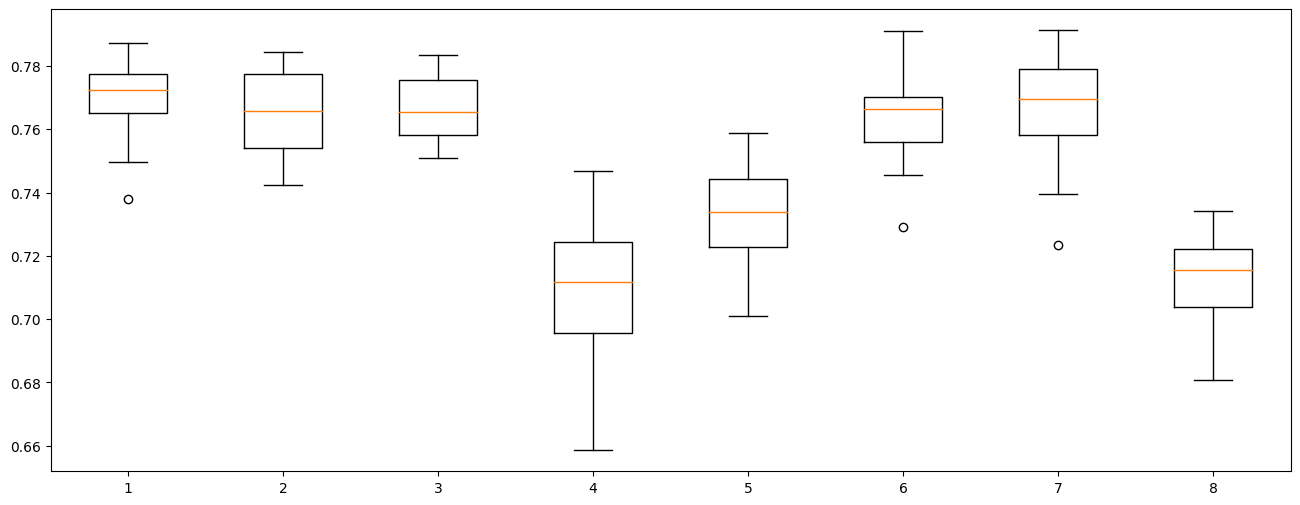

In [20]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [22]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val


0.3595871936026529

In [23]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[2])
p_val


0.38206089484906414

In [24]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[3])
p_val


3.610765834782358e-13

In [25]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[4])
p_val


1.1522002713339958e-09

In [26]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[5])
p_val


0.20322711426441945

In [27]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[6])
p_val


0.7031111634947695

**Лучше всех Adam with learning rate = 0.005**